In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/gtzan/features_30_sec.csv'
data = pd.read_csv(dataset_path)

In [ ]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


The data.shape command in Python provides the dimensions of the data DataFrame, indicating the number of rows and columns.

data.shape returns a tuple: (number_of_rows, number_of_columns).
number_of_rows: The number of samples or data points in the DataFrame.
number_of_columns: The number of features or variables (columns) in the DataFrame.
Example
If data.shape returns (1000, 20), it means:

There are 1000 rows (samples).
There are 20 columns (features).

In [ ]:
data.shape

(1000, 60)

In [ ]:
data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
print("Columns containing missing values",list(data.columns[data.isnull().any()]))

Columns containing missing values []


This code uses label encoding to transform categorical labels (text labels) into numerical form, which is required for many machine learning models.

1) Extracting the Target Column: data.iloc[:, -1] selects the last column of the data DataFrame.
class_encod contains the categorical target values (e.g., genre labels like "rock," "jazz").

2) Creating a Label Encoder: Initializes a LabelEncoder instance called converter.
LabelEncoder is used to transform categorical values into integers.

3) Fitting and Transforming Labels: fit_transform() first learns the unique classes (labels) in class_encod and then converts each class to a unique integer.
Stores the encoded labels in y, with each unique class represented by a distinct integer.This displays y, the encoded labels. For example, if the original labels were ["rock," "jazz," "classical"], they might be converted to [0, 1, 2].

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_encod=data.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

The code data.iloc[:, :-1] uses the iloc method to select all rows and all columns except the last one in the data DataFrame.

Explanation
data.iloc[:, :-1]:
: (before the comma) specifies all rows.
:-1 (after the comma) selects all columns except the last one.
This is often used to separate features (input data) from the target (output or label) column in a dataset. If the last column contains target labels (as in classification tasks), this code would select only the input features.

In [ ]:
print(data.iloc[:,:-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075269  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0028

he code data = data.drop(labels="filename", axis=1) removes the "filename" column from the data DataFrame.

Explanation
data.drop(labels="filename", axis=1):

labels="filename" specifies the name of the column you want to drop.
axis=1 indicates that you’re removing a column (if you set axis=0, it would drop rows).
data = reassigns the modified DataFrame to data, effectively removing the "filename" column from data.

In [ ]:
data=data.drop(labels="filename",axis=1)

This code snippet scales the feature columns in the data DataFrame using standardization, a common preprocessing step in machine learning.


In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(data.iloc[:,:-1],dtype=float))

This code splits the data into training and testing sets using train_test_split from scikit-learn.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
len(y_test)

300

In [ ]:
len(y_train)

700

In [ ]:
from sklearn.svm import SVC

This code initializes and trains a Support Vector Classifier (SVC) from scikit-learn on the training dataset using the Radial Basis Function (RBF) kernel.

1) Creating the Classifier: SVC is a Support Vector Classifier, a type of Support Vector Machine (SVM) used for classification tasks.
kernel='rbf': Specifies the kernel type as "Radial Basis Function (RBF)"—a popular choice for non-linear classification. The RBF kernel maps data into a higher-dimensional space, which can help in finding a separating hyperplane.
degree=8: Although degree is typically relevant only for the polynomial kernel, here it’s included in the parameters. The RBF kernel will ignore this parameter.

2) Training the Model: fit(X_train, y_train): Trains the classifier on the training data (X_train and y_train).
During training, the SVC model learns to classify samples in X_train by finding the optimal hyperplane that separates classes as clearly as possible.



In [ ]:
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8)

This code evaluates the Support Vector Classifier (SVC) on both the training and testing sets, then displays a confusion matrix and a classification report for the model’s performance.



Training set score: 0.890
Test set score: 0.730
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        22
           1       0.89      0.86      0.87        28
           2       0.77      0.91      0.83        22
           3       0.66      0.68      0.67        34
           4       0.84      0.67      0.74        39
           5       0.74      0.91      0.82        32
           6       0.76      0.88      0.81        25
           7       0.92      0.63      0.75        38
           8       0.56      0.79      0.66        28
           9       0.47      0.28      0.35        32

    accuracy                           0.73       300
   macro avg       0.73      0.75      0.73       300
weighted avg       0.74      0.73      0.72       300



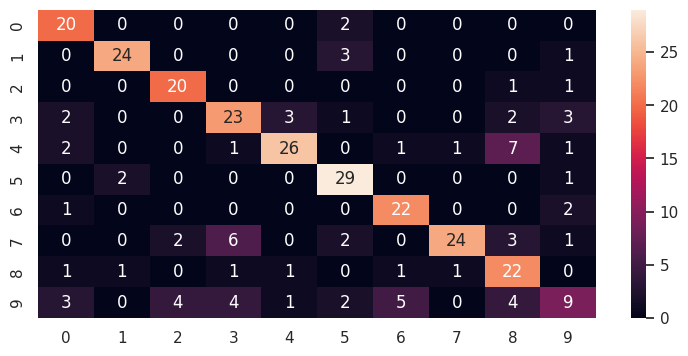

In [ ]:
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))